In [1]:
library(tidyverse)
library(nycflights13)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## [12.2.4 Exercises](https://r4ds.hadley.nz/logicals#exercises)

1. How does dplyr::near() work? Type near to see the source code. Is sqrt(2)^2 near 2?

It has a built in tolerance for when a comparison is very close to each other. sqrt(2)^2 is near 2 so it would be true when using near().

In [3]:
near

function (x, y, tol = .Machine$double.eps^0.5) 
{
    abs(x - y) < tol
}
<bytecode: 0x56354d057630>
<environment: namespace:dplyr>

2. Use mutate(), is.na(), and count() together to describe how the missing values in dep_time, sched_dep_time and dep_delay are connected.

In [2]:
flights |>
    mutate(
        dep_time_na = is.na(dep_time), 
        sched_dep_time_na = is.na(sched_dep_time), 
        dep_delay_na = is.na(dep_delay)) |>
    count(dep_time_na, sched_dep_time_na, dep_delay_na)

dep_time_na,sched_dep_time_na,dep_delay_na,n
<lgl>,<lgl>,<lgl>,<int>
FALSE,FALSE,FALSE,328521
TRUE,FALSE,TRUE,8255


When dep_time is missing, so is dep_delay. More often than not, sched_dep_time is also missing, but not always.

## [12.3.4 Exercises](https://r4ds.hadley.nz/logicals#exercises-1)

1. Find all flights where arr_delay is missing but dep_delay is not. Find all flights where neither arr_time nor sched_arr_time are missing, but arr_delay is.

In [7]:
flights |>
    filter(arr_delay %in% NA & !dep_delay %in% NA)

flights |>
    filter(arr_delay %in% NA & !arr_time %in% NA & !sched_arr_time %in% NA)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,1525,1530,-5,1934,1805,NA,MQ,4525,N719MQ,LGA,XNA,NA,1147,15,30,2013-01-01 15:00:00
2013,1,1,1528,1459,29,2002,1647,NA,EV,3806,N17108,EWR,STL,NA,872,14,59,2013-01-01 14:00:00
2013,1,1,1740,1745,-5,2158,2020,NA,MQ,4413,N739MQ,LGA,XNA,NA,1147,17,45,2013-01-01 17:00:00
2013,1,1,1807,1738,29,2251,2103,NA,UA,1228,N31412,EWR,SAN,NA,2425,17,38,2013-01-01 17:00:00
2013,1,1,1939,1840,59,29,2151,NA,9E,3325,N905XJ,JFK,DFW,NA,1391,18,40,2013-01-01 18:00:00
2013,1,1,1952,1930,22,2358,2207,NA,EV,4333,N11194,EWR,TUL,NA,1215,19,30,2013-01-01 19:00:00
2013,1,1,2016,1930,46,NA,2220,NA,EV,4204,N14168,EWR,OKC,NA,1325,19,30,2013-01-01 19:00:00
2013,1,2,905,822,43,1313,1045,NA,EV,4140,N15912,EWR,XNA,NA,1131,8,22,2013-01-02 08:00:00
2013,1,2,1125,925,120,1445,1146,NA,9E,3658,N8783E,LGA,GRR,NA,618,9,25,2013-01-02 09:00:00


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,1525,1530,-5,1934,1805,NA,MQ,4525,N719MQ,LGA,XNA,NA,1147,15,30,2013-01-01 15:00:00
2013,1,1,1528,1459,29,2002,1647,NA,EV,3806,N17108,EWR,STL,NA,872,14,59,2013-01-01 14:00:00
2013,1,1,1740,1745,-5,2158,2020,NA,MQ,4413,N739MQ,LGA,XNA,NA,1147,17,45,2013-01-01 17:00:00
2013,1,1,1807,1738,29,2251,2103,NA,UA,1228,N31412,EWR,SAN,NA,2425,17,38,2013-01-01 17:00:00
2013,1,1,1939,1840,59,29,2151,NA,9E,3325,N905XJ,JFK,DFW,NA,1391,18,40,2013-01-01 18:00:00
2013,1,1,1952,1930,22,2358,2207,NA,EV,4333,N11194,EWR,TUL,NA,1215,19,30,2013-01-01 19:00:00
2013,1,2,905,822,43,1313,1045,NA,EV,4140,N15912,EWR,XNA,NA,1131,8,22,2013-01-02 08:00:00
2013,1,2,1125,925,120,1445,1146,NA,9E,3658,N8783E,LGA,GRR,NA,618,9,25,2013-01-02 09:00:00
2013,1,2,1848,1840,8,2333,2151,NA,9E,3325,N920XJ,JFK,DFW,NA,1391,18,40,2013-01-02 18:00:00


2. How many flights have a missing dep_time? What other variables are missing in these rows? What might these rows represent?

In [9]:
flights |>
    filter(dep_time %in% NA)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,NA,1630,NA,NA,1815,NA,EV,4308,N18120,EWR,RDU,NA,416,16,30,2013-01-01 16:00:00
2013,1,1,NA,1935,NA,NA,2240,NA,AA,791,N3EHAA,LGA,DFW,NA,1389,19,35,2013-01-01 19:00:00
2013,1,1,NA,1500,NA,NA,1825,NA,AA,1925,N3EVAA,LGA,MIA,NA,1096,15,0,2013-01-01 15:00:00
2013,1,1,NA,600,NA,NA,901,NA,B6,125,N618JB,JFK,FLL,NA,1069,6,0,2013-01-01 06:00:00
2013,1,2,NA,1540,NA,NA,1747,NA,EV,4352,N10575,EWR,CVG,NA,569,15,40,2013-01-02 15:00:00
2013,1,2,NA,1620,NA,NA,1746,NA,EV,4406,N13949,EWR,PIT,NA,319,16,20,2013-01-02 16:00:00
2013,1,2,NA,1355,NA,NA,1459,NA,EV,4434,N10575,EWR,MHT,NA,209,13,55,2013-01-02 13:00:00
2013,1,2,NA,1420,NA,NA,1644,NA,EV,4935,N759EV,EWR,ATL,NA,746,14,20,2013-01-02 14:00:00
2013,1,2,NA,1321,NA,NA,1536,NA,EV,3849,N13550,EWR,IND,NA,645,13,21,2013-01-02 13:00:00


dep_delay, arr_time, arr_delay, and air_time are also NA. It could mean that the flight was canceled.

3. Assuming that a missing dep_time implies that a flight is cancelled, look at the number of cancelled flights per day. Is there a pattern? Is there a connection between the proportion of cancelled flights and the average delay of non-cancelled flights?

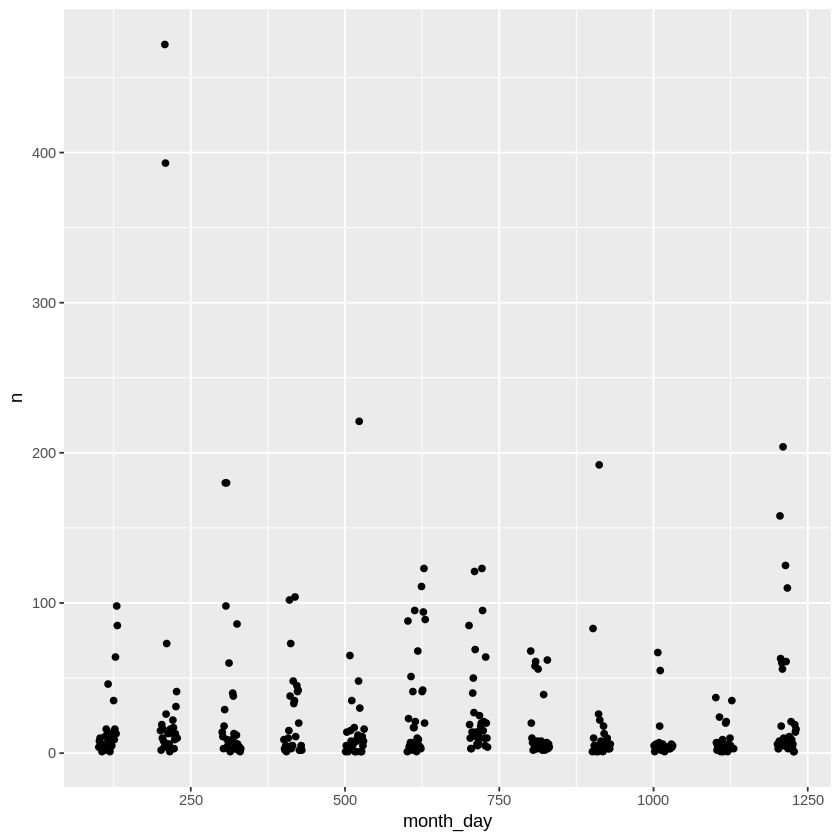

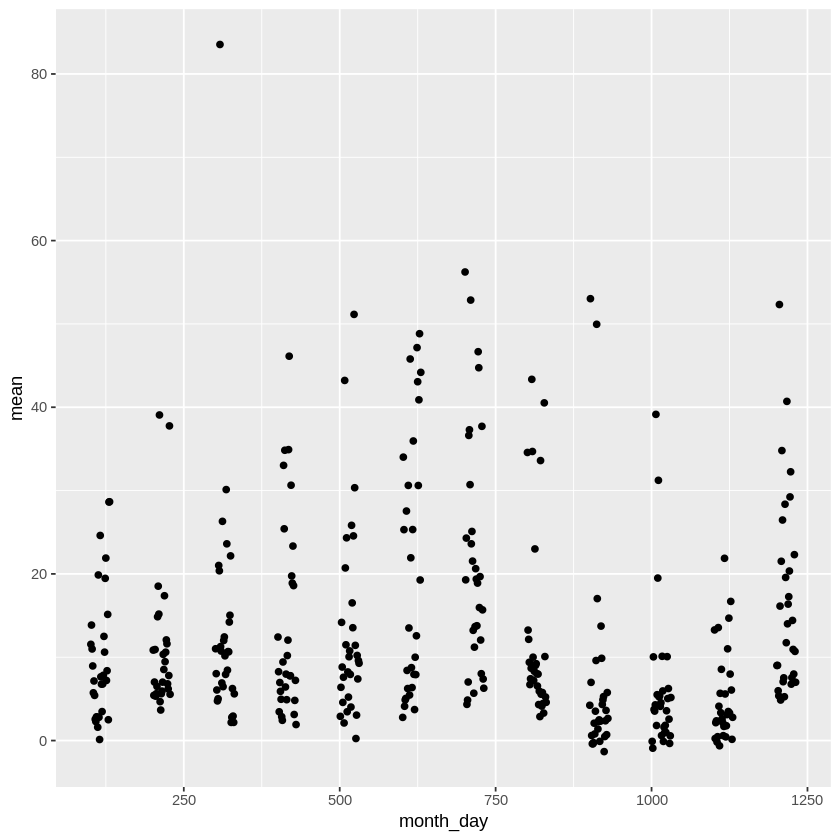

In [51]:
flights |>
    mutate(month_day = (month*100)+day) |>
    filter(dep_time %in% NA) |>
    count(month_day) |>
    ggplot() +
    geom_point(aes(x = month_day, y = n))

flights |>
    mutate(month_day = (month*100)+day) |>
    group_by(month_day) |>
    summarise(mean = mean(dep_delay, na.rm = TRUE)) |>
    ggplot() +
    geom_point(aes(x = month_day, y = mean))




I don't see a pattern or connection.

## [12.4.4 Exercises](https://r4ds.hadley.nz/logicals#exercises-2)

1. What will sum(is.na(x)) tell you? How about mean(is.na(x))?

ssum(is.na(x)) will tell you how many NA values there are and mean(is.na(x)) will tell you the proportion of vlaues that are NA.

2. What does prod() return when applied to a logical vector? What logical summary function is it equivalent to? What does min() return when applied to a logical vector? What logical summary function is it equivalent to? Read the documentation and perform a few experiments.

In a logical vector, true is treated as 1 and false as 0. prod() will give you the product of all values in the vector so if any values are false, it returns false. It is like all(). min() will give you the smallest value in the vector so if any values are false, it returns false. It is like all().

## [12.5.4 Exercises](https://r4ds.hadley.nz/logicals#exercises-3)

1. A number is even if it’s divisible by two, which in R you can find out with x %% 2 == 0. Use this fact and if_else() to determine whether each number between 0 and 20 is even or odd.

In [54]:
x <- 0:20

if_else(x%%2 == 0, "even", "odd")

[1] "even" "odd"  "even" "odd"  "even" "odd"  "even" "odd"  "even" "odd" 
[11] "even" "odd"  "even" "odd"  "even" "odd"  "even" "odd"  "even" "odd" 
[21] "even"

2. Given a vector of days like x <- c("Monday", "Saturday", "Wednesday"), use an if_else() statement to label them as weekends or weekdays.

In [55]:
x <- c("Monday", "Saturday", "Wednesday")

if_else(x %in% c("Saturday", "Sunday"), "Weekend", "Weekday")

[1] "Weekday" "Weekend" "Weekday"

3. Use if_else() to compute the absolute value of a numeric vector called x.

In [56]:
x <- -5:5

if_else(x < 0, -x, x)

[1] 5 4 3 2 1 0 1 2 3 4 5

4. Write a case_when() statement that uses the month and day columns from flights to label a selection of important US holidays (e.g., New Years Day, 4th of July, Thanksgiving, and Christmas). First create a logical column that is either TRUE or FALSE, and then create a character column that either gives the name of the holiday or is NA.

In [58]:
flights |> 
  mutate(
    Holiday = case_when(
      month == 1 & day == 1 ~ "New Years Day",
      month == 2 & day == 14 ~ "Valentine's Day",
      month == 3 & day == 31 ~ "Easter",
      month == 7 & day == 4 ~ "4th of July",
      month == 10 & day == 31 ~ "Halloween",
      month == 11 & day == 28 ~ "Thanksgiving",
      month == 12 & day == 25 ~ "Christmas",
    ),
    .keep = "used"
  )

month,day,Holiday
<int>,<int>,<chr>
1,1,New Years Day
1,1,New Years Day
1,1,New Years Day
1,1,New Years Day
1,1,New Years Day
1,1,New Years Day
1,1,New Years Day
1,1,New Years Day
1,1,New Years Day


## [13.3.1 Exercises](https://r4ds.hadley.nz/numbers#exercises)

1. How can you use count() to count the number of rows with a missing value for a given variable?

Do count(is.na(variable)). The row True is the number of rows that have NA. Example below.

In [62]:
flights |>
    count(is.na(arr_delay))

is.na(arr_delay),n
<lgl>,<int>
FALSE,327346
TRUE,9430


2. Expand the following calls to count() to instead use group_by(), summarize(), and arrange():

    1. flights |> count(dest, sort = TRUE)

    2. flights |> count(tailnum, wt = distance)

In [9]:
flights |> 
    group_by(dest) |>
    summarize(n = n()) |>
    arrange(desc(n))

flights |>
    group_by(tailnum) |>
    summarize(n = sum(distance))

dest,n
<chr>,<int>
ORD,17283
ATL,17215
LAX,16174
BOS,15508
MCO,14082
CLT,14064
SFO,13331
FLL,12055
MIA,11728


tailnum,n
<chr>,<dbl>
D942DN,3418
N0EGMQ,250866
N10156,115966
N102UW,25722
N103US,24619
N104UW,25157
N10575,150194
N105UW,23618
N107US,21677


## [13.4.8 Exercises](https://r4ds.hadley.nz/numbers#exercises-1)

1. Explain in words what each line of the code used to generate [Figure 13.1](https://r4ds.hadley.nz/numbers.html#fig-prop-cancelled) does.

flights - Gets dataset called flights
group_by(hour = sched_dep_time %/% 100) - groups flights by a new column called hour that takes the hundreds place of the sched_dep_time.  
summarize(prop_cancelled = mean(is.na(dep_time)), n = n()) - creates a summary of the porportion of canceled flights in a column called prop_cancelled    
filter(hour > 1) - removes rows that have an hour value of 1 or less    
ggplot(aes(x = hour, y = prop_cancelled)) - creates a plot with the x-axis being hour and the y-axis being prop_canceled   
geom_line(color = "grey50") - creates a line on the plot that is grey in color    
geom_point(aes(size = n)) - addes point to the graph that change in size with the count at each value

2. What trigonometric functions does R provide? Guess some names and look up the documentation. Do they use degrees or radians?

sine(), cosine(), tangent(), secant(), cosecant(), cotangent(), angle(). They can use both degrees or radians.

3. Currently dep_time and sched_dep_time are convenient to look at, but hard to compute with because they’re not really continuous numbers. You can see the basic problem by running the code below: there’s a gap between each hour.
```r
flights |> 
  filter(month == 1, day == 1) |> 
  ggplot(aes(x = sched_dep_time, y = dep_delay)) +
  geom_point()
```
Convert them to a more truthful representation of time (either fractional hours or minutes since midnight).

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


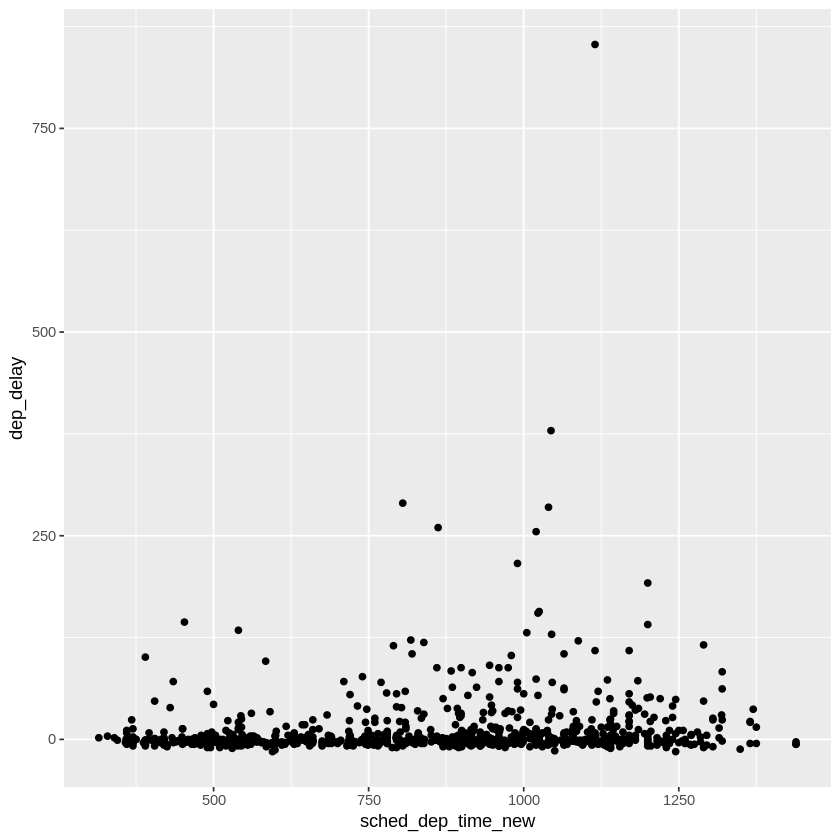

In [20]:
flights |> 
  filter(month == 1, day == 1) |> 
  mutate(sched_dep_time_new = ((sched_dep_time %/% 100) * 60) + (sched_dep_time %% 100)) |>
  ggplot(aes(x = sched_dep_time_new, y = dep_delay)) +
  geom_point()

4. Round dep_time and arr_time to the nearest five minutes.

In [4]:
flights |>
    mutate(dep_time_round = round(dep_time / 5) * 5, arr_time_round = round(arr_time / 5) * 5) |>
    select(dep_time, dep_time_round, arr_time, arr_time_round)

dep_time,dep_time_round,arr_time,arr_time_round
<int>,<dbl>,<int>,<dbl>
517,515,830,830
533,535,850,850
542,540,923,925
544,545,1004,1005
554,555,812,810
554,555,740,740
555,555,913,915
557,555,709,710
557,555,838,840


## [13.5.4 Exercises](https://r4ds.hadley.nz/numbers#exercises-2)

1. Find the 10 most delayed flights using a ranking function. How do you want to handle ties? Carefully read the documentation for min_rank().

In [10]:
flights |> 
    mutate(rank = min_rank(desc(dep_delay))) |>
    arrange(rank) |>
    filter(rank %in% 1:10)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,rank
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00,1
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00,2
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00,3
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00,4
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00,5
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00,6
2013,3,17,2321,810,911,135,1020,915,DL,2119,N927DA,LGA,MSP,167,1020,8,10,2013-03-17 08:00:00,7
2013,6,27,959,1900,899,1236,2226,850,DL,2007,N3762Y,JFK,PDX,313,2454,19,0,2013-06-27 19:00:00,8
2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00,9


2. Which plane (tailnum) has the worst on-time record?

In [12]:
flights |>
    group_by(tailnum) |>
    summarize(mean = mean(arr_delay, na.rm = TRUE)) |>
    arrange(desc(mean))

tailnum,mean
<chr>,<dbl>
N844MH,320.00000
N911DA,294.00000
N922EV,276.00000
N587NW,264.00000
N851NW,219.00000
N928DN,201.00000
N7715E,188.00000
N654UA,185.00000
N665MQ,174.66667


N844MH has the worst on-time record.

3. What time of day should you fly if you want to avoid delays as much as possible?

Warning message:
“Removed 8255 rows containing missing values or values outside the scale range
(`geom_point()`).”


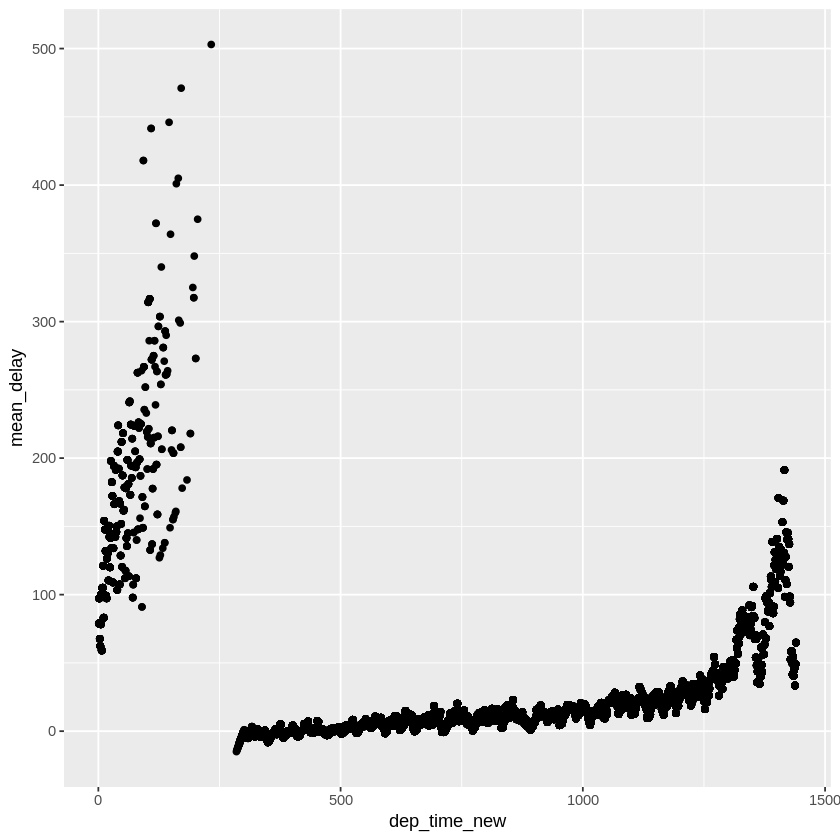

In [17]:
flights |>
    mutate(dep_time_new = ((dep_time %/% 100) * 60) + (dep_time %% 100)) |>
    group_by(dep_time_new) |>
    mutate(mean_delay = mean(dep_delay, na.rm = TRUE)) |>
    ggplot(aes(x = dep_time_new, y = mean_delay)) +
    geom_point()

The best time to fly around 4 to 5 in the morning.

4. What does flights |> group_by(dest) |> filter(row_number() < 4) do? What does flights |> group_by(dest) |> filter(row_number(dep_delay) < 4) do?

The first one groups by destination, then filters the rows to be the first three rows of each destination. The second also groups by destination, but then filters the rows to be the three lowest values of dep_delay for each destination.

5. For each destination, compute the total minutes of delay. For each flight, compute the proportion of the total delay for its destination.

In [28]:
flights |>
    group_by(dest) |>
    summarize(total_delays = sum(arr_delay, na.rm = TRUE))

flights |>
    filter(arr_delay >= 0) |>
    mutate(delay_proportion = arr_delay / air_time) |>
    select(flight, delay_proportion)

dest,total_delays
<chr>,<dbl>
ABQ,1113
ACK,1281
ALB,6018
ANC,-20
ATL,190260
AUS,14514
AVL,2089
BDL,2904
BGR,2874


flight,delay_proportion
<int>,<dbl>
1545,0.048458150
1714,0.088105727
1141,0.206250000
1696,0.080000000
507,0.120253165
301,0.057971014
194,0.020289855
707,0.120622568
4650,0.089552239


6. Delays are typically temporally correlated: even once the problem that caused the initial delay has been resolved, later flights are delayed to allow earlier flights to leave. Using lag(), explore how the average flight delay for an hour is related to the average delay for the previous hour.
```r
flights |> 
  mutate(hour = dep_time %/% 100) |> 
  group_by(year, month, day, hour) |> 
  summarize(
    dep_delay = mean(dep_delay, na.rm = TRUE),
    n = n(),
    .groups = "drop"
  ) |> 
  filter(n > 5)
```

Warning message:
“Removed 37 rows containing missing values or values outside the scale range
(`geom_point()`).”


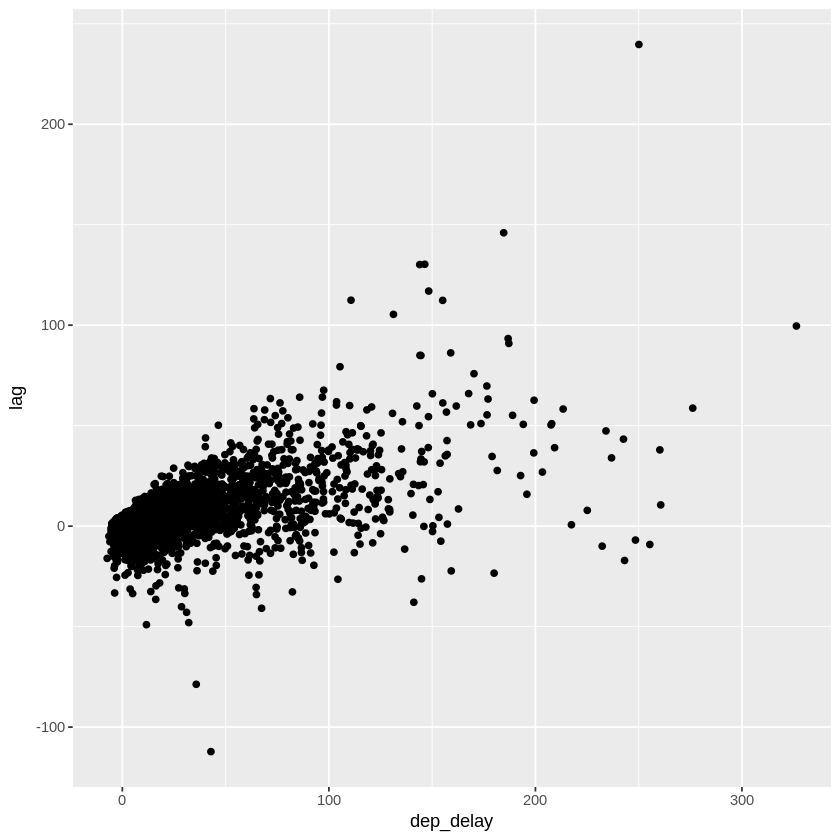

In [37]:
flights |> 
  mutate(hour = dep_time %/% 100) |> 
  group_by(year, month, day, hour) |> 
  summarize(
    dep_delay = mean(dep_delay, na.rm = TRUE),
    n = n(),
    .groups = "drop"
  ) |> 
  filter(n > 5) |>
  mutate(lag = dep_delay - lag(dep_delay)) |>
  filter(!hour == 5) |>
  ggplot(aes(x = dep_delay, y = lag)) +
  geom_point()

There appears to be a correlation between delays for an hour and the hour previous.

7. Look at each destination. Can you find flights that are suspiciously fast (i.e. flights that represent a potential data entry error)? Compute the air time of a flight relative to the shortest flight to that destination. Which flights were most delayed in the air?

First table has some of the fastest flights and the second has the longest.

In [59]:
flights |>
    group_by(dest) |>
    mutate(
        min_air_time = min(air_time, na.rm = TRUE),
        avg_air_time = mean(air_time, na.rm = TRUE)) |>
    mutate(diff_of_min = air_time - min_air_time, ratio = air_time / avg_air_time) |>
    select(dest, air_time, min_air_time, avg_air_time, diff_of_min, ratio) |>
    arrange(ratio) |>
    filter(ratio < 0.6)

flights |>
    group_by(dest) |>
    mutate(
        min_air_time = min(air_time, na.rm = TRUE),
        avg_air_time = mean(air_time, na.rm = TRUE)) |>
    mutate(diff_of_min = air_time - min_air_time, ratio = air_time / avg_air_time) |>
    select(dest, air_time, min_air_time, avg_air_time, diff_of_min, ratio) |>
    arrange(desc(ratio)) |>
    filter(ratio > 2.5)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `min_air_time = min(air_time, na.rm = TRUE)`.
ℹ In group 52: `dest = "LGA"`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf”


dest,air_time,min_air_time,avg_air_time,diff_of_min,ratio
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BOS,21,21,38.95300,0,0.5391112
ATL,65,65,112.93045,0,0.5755755
GSP,55,55,93.39494,0,0.5888970
BOS,23,21,38.95300,2,0.5904551


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `min_air_time = min(air_time, na.rm = TRUE)`.
ℹ In group 52: `dest = "LGA"`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf”


dest,air_time,min_air_time,avg_air_time,diff_of_min,ratio
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACK,141,35,42.06818,106,3.351702
BOS,112,21,38.95300,91,2.875260
DCA,131,32,45.85655,99,2.856735
BOS,107,21,38.95300,86,2.746900
BOS,99,21,38.95300,78,2.541524
DCA,115,32,45.85655,83,2.507821


8. Find all destinations that are flown by at least two carriers. Use those destinations to come up with a relative ranking of the carriers based on their performance for the same destination.

In [86]:
destination <- flights |>
    group_by(dest) |>
    summarize(num_carriers = n_distinct(carrier)) |>
    filter(num_carriers >= 2) |>
    select(dest)

flights |>
    filter(dest %in% destination$dest) |>
    group_by(dest, carrier) |>
    summarize(avg_arr_delay = mean(arr_delay, na.rm = TRUE), .groups = "drop") |>
    mutate(rank = min_rank(avg_arr_delay)) |>
    group_by(carrier) |>
    summarize(rank_sum = sum(rank)) |>
    arrange(rank_sum)

carrier,rank_sum
<chr>,<int>
AS,22
HA,28
F9,271
FL,336
VX,410
US,481
YV,486
OO,835
WN,1589


The carrier AS has the overall lowest arrival delays.

## [13.6.7 Exercises](https://r4ds.hadley.nz/numbers#exercises-3)

1. Brainstorm at least 5 different ways to assess the typical delay characteristics of a group of flights. When is mean() useful? When is median() useful? When might you want to use something else? Should you use arrival delay or departure delay? Why might you want to use data from planes?

- mean()
- median()
- IQR()
- quantile()
- mode()
  
mean() is more useful when the data is symmetrical and median() is more useful when the data is skewed. Most delay comes from departing late rather than slow air time, so you should use dep_delay more often.

2. Which destinations show the greatest variation in air speed?

In [91]:
flights |> 
    mutate(
        air_time_median = median(air_time, na.rm = TRUE),
        air_time_iqr = IQR(air_time, na.rm = TRUE),
        n = n(),
        q999 = quantile(air_time, 0.999, na.rm = TRUE),
        q001 = quantile(air_time, 0.001, na.rm = TRUE),
        air_time_standard = (air_time - air_time_median) / air_time_iqr
    ) |> 
    filter(air_time >= q999 | air_time <= q001) |> 
    group_by(dest) |> 
    summarize(n = n()) |>
    arrange(n)

dest,n
<chr>,<int>
ALB,2
BOS,2
PHL,104
BDL,251
HNL,334


3. Create a plot to further explore the adventures of EGE. Can you find any evidence that the airport moved locations? Can you find another variable that might explain the difference?

In [95]:
flights |>
    filter(dest == "EGE") |>
    group_by(distance) |>
    count()

flights |>
    filter(dest == "EGE") |>
    group_by(origin,distance) |>
    count()

distance,n
<dbl>,<int>
1725,51
1726,59
1746,44
1747,59


origin,distance,n
<chr>,<dbl>,<int>
EWR,1725,51
EWR,1726,59
JFK,1746,44
JFK,1747,59


After looking at the origin variable, the separation that appears in the distance is most likely caused by the difference in distance bewteen EWR and JFk rather than the airport EGE moving locations.